## Hurricane Damage Detection

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow import keras
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [5]:
pwd

'C:\\Users\\sreer\\Edure\\Data Science\\deep learning\\Deep learning capstone projects\\Huriccane Damage Detection'

In [6]:
import glob

In [7]:
damage = glob.glob('test/damage/*.jpeg')
no_damage = glob.glob('test/no_damage/*.jpeg')

In [8]:
damage

['test/damage\\-93.548123_30.900623.jpeg',
 'test/damage\\-93.560128_30.894917.jpeg',
 'test/damage\\-93.578271_30.779923999999998.jpeg',
 'test/damage\\-93.590598_30.694956.jpeg',
 'test/damage\\-93.604017_30.793719.jpeg',
 'test/damage\\-93.6141_30.754263.jpeg',
 'test/damage\\-93.618483_30.730039.jpeg',
 'test/damage\\-93.65613_30.076164000000002.jpeg',
 'test/damage\\-93.658785_30.206929.jpeg',
 'test/damage\\-93.659161_30.202384999999996.jpeg',
 'test/damage\\-93.65936500000001_30.138793.jpeg',
 'test/damage\\-93.659805_30.138094.jpeg',
 'test/damage\\-93.660431_30.20485.jpeg',
 'test/damage\\-93.661241_30.212164.jpeg',
 'test/damage\\-93.66200400000001_30.201602.jpeg',
 'test/damage\\-93.662444_30.201583000000003.jpeg',
 'test/damage\\-93.662984_30.209982.jpeg',
 'test/damage\\-93.6654_30.140094.jpeg',
 'test/damage\\-93.666735_30.201598999999998.jpeg',
 'test/damage\\-93.667964_30.143383.jpeg',
 'test/damage\\-93.669493_30.217792.jpeg',
 'test/damage\\-93.669804_30.221032.jpeg',

In [9]:
no_damage

['test/no_damage\\-95.061894_30.007746.jpeg',
 'test/no_damage\\-95.061936_29.828088.jpeg',
 'test/no_damage\\-95.062123_30.056714000000003.jpeg',
 'test/no_damage\\-95.062203_29.82817.jpeg',
 'test/no_damage\\-95.062246_30.056189.jpeg',
 'test/no_damage\\-95.062371_29.829815999999997.jpeg',
 'test/no_damage\\-95.063004_29.8308.jpeg',
 'test/no_damage\\-95.06329699999999_30.037322999999997.jpeg',
 'test/no_damage\\-95.064612_29.792707.jpeg',
 'test/no_damage\\-95.065044_29.832065999999998.jpeg',
 'test/no_damage\\-95.065342_30.039215000000002.jpeg',
 'test/no_damage\\-95.066017_29.811658.jpeg',
 'test/no_damage\\-95.066162_29.792391.jpeg',
 'test/no_damage\\-95.066506_29.831463.jpeg',
 'test/no_damage\\-95.066743_29.832062.jpeg',
 'test/no_damage\\-95.06698_29.831493.jpeg',
 'test/no_damage\\-95.067122_30.03769.jpeg',
 'test/no_damage\\-95.06767099999999_29.813495.jpeg',
 'test/no_damage\\-95.068663_29.831690000000002.jpeg',
 'test/no_damage\\-95.071273_30.039915.jpeg',
 'test/no_damag

In [10]:
len(damage)

1000

In [11]:
len(no_damage)

1000

In [12]:
damage_test = glob.glob('test_another//damage/*.jpeg')
no_damage_test = glob.glob('test_another//no_damage/*.jpeg')

In [13]:
damage_test

['test_another//damage\\-93.528502_30.987438.jpeg',
 'test_another//damage\\-93.5302_30.988157.jpeg',
 'test_another//damage\\-93.53950999999999_30.982944.jpeg',
 'test_another//damage\\-93.539521_30.982434.jpeg',
 'test_another//damage\\-93.540151_30.982689.jpeg',
 'test_another//damage\\-93.547871_30.900207.jpeg',
 'test_another//damage\\-93.548123_30.900623.jpeg',
 'test_another//damage\\-93.54819300000001_30.901116.jpeg',
 'test_another//damage\\-93.553566_30.842361999999998.jpeg',
 'test_another//damage\\-93.55919200000001_30.98323.jpeg',
 'test_another//damage\\-93.560128_30.894917.jpeg',
 'test_another//damage\\-93.560702_30.766426.jpeg',
 'test_another//damage\\-93.560879_30.766663.jpeg',
 'test_another//damage\\-93.561578_30.985207.jpeg',
 'test_another//damage\\-93.567212_30.976639000000002.jpeg',
 'test_another//damage\\-93.568855_30.695041999999997.jpeg',
 'test_another//damage\\-93.569715_30.973932.jpeg',
 'test_another//damage\\-93.571101_30.992109000000003.jpeg',
 'test_

In [14]:
no_damage_test

['test_another//no_damage\\-95.062321_30.060401000000002.jpeg',
 'test_another//no_damage\\-95.062533_30.055047.jpeg',
 'test_another//no_damage\\-95.062589_29.830265.jpeg',
 'test_another//no_damage\\-95.062638_30.009412.jpeg',
 'test_another//no_damage\\-95.06315699999999_29.831297999999997.jpeg',
 'test_another//no_damage\\-95.06354_30.007773999999998.jpeg',
 'test_another//no_damage\\-95.065175_30.059086999999998.jpeg',
 'test_another//no_damage\\-95.065347_30.041307.jpeg',
 'test_another//no_damage\\-95.06604899999999_29.831622999999997.jpeg',
 'test_another//no_damage\\-95.066202_29.832154.jpeg',
 'test_another//no_damage\\-95.066283_29.792195.jpeg',
 'test_another//no_damage\\-95.066797_29.832078999999997.jpeg',
 'test_another//no_damage\\-95.06698_29.831493.jpeg',
 'test_another//no_damage\\-95.067092_29.832040999999997.jpeg',
 'test_another//no_damage\\-95.067696_29.831792999999998.jpeg',
 'test_another//no_damage\\-95.067698_29.813492.jpeg',
 'test_another//no_damage\\-95.068

In [15]:
print(f'The number of images in Training set are\nDamage:{len(damage)}')
print(f'NO Damage: {len(no_damage)}')
print(f'Damage test:{len(damage_test)}')
print(f'No Damage test:{len(no_damage_test)}')

The number of images in Training set are
Damage:1000
NO Damage: 1000
Damage test:8000
No Damage test:1000


In [16]:

# fOR TRAINING SET

image =[] 
label =[] 

for i in damage:
    img = plt.imread(i)
    image.append(img)
    label.append(0) 

for i in no_damage: 
    img = plt.imread(i)
    image.append(img)
    label.append(1)

In [17]:

# fOR Testing SET

image_test =[] 
label_test=[] 

for i in damage:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0) 

for i in no_damage: 
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

In [18]:
image,label = shuffle(image,label, random_state=100)
image_test , label_test = shuffle(image_test,label_test)

In [19]:
len(image)

2000

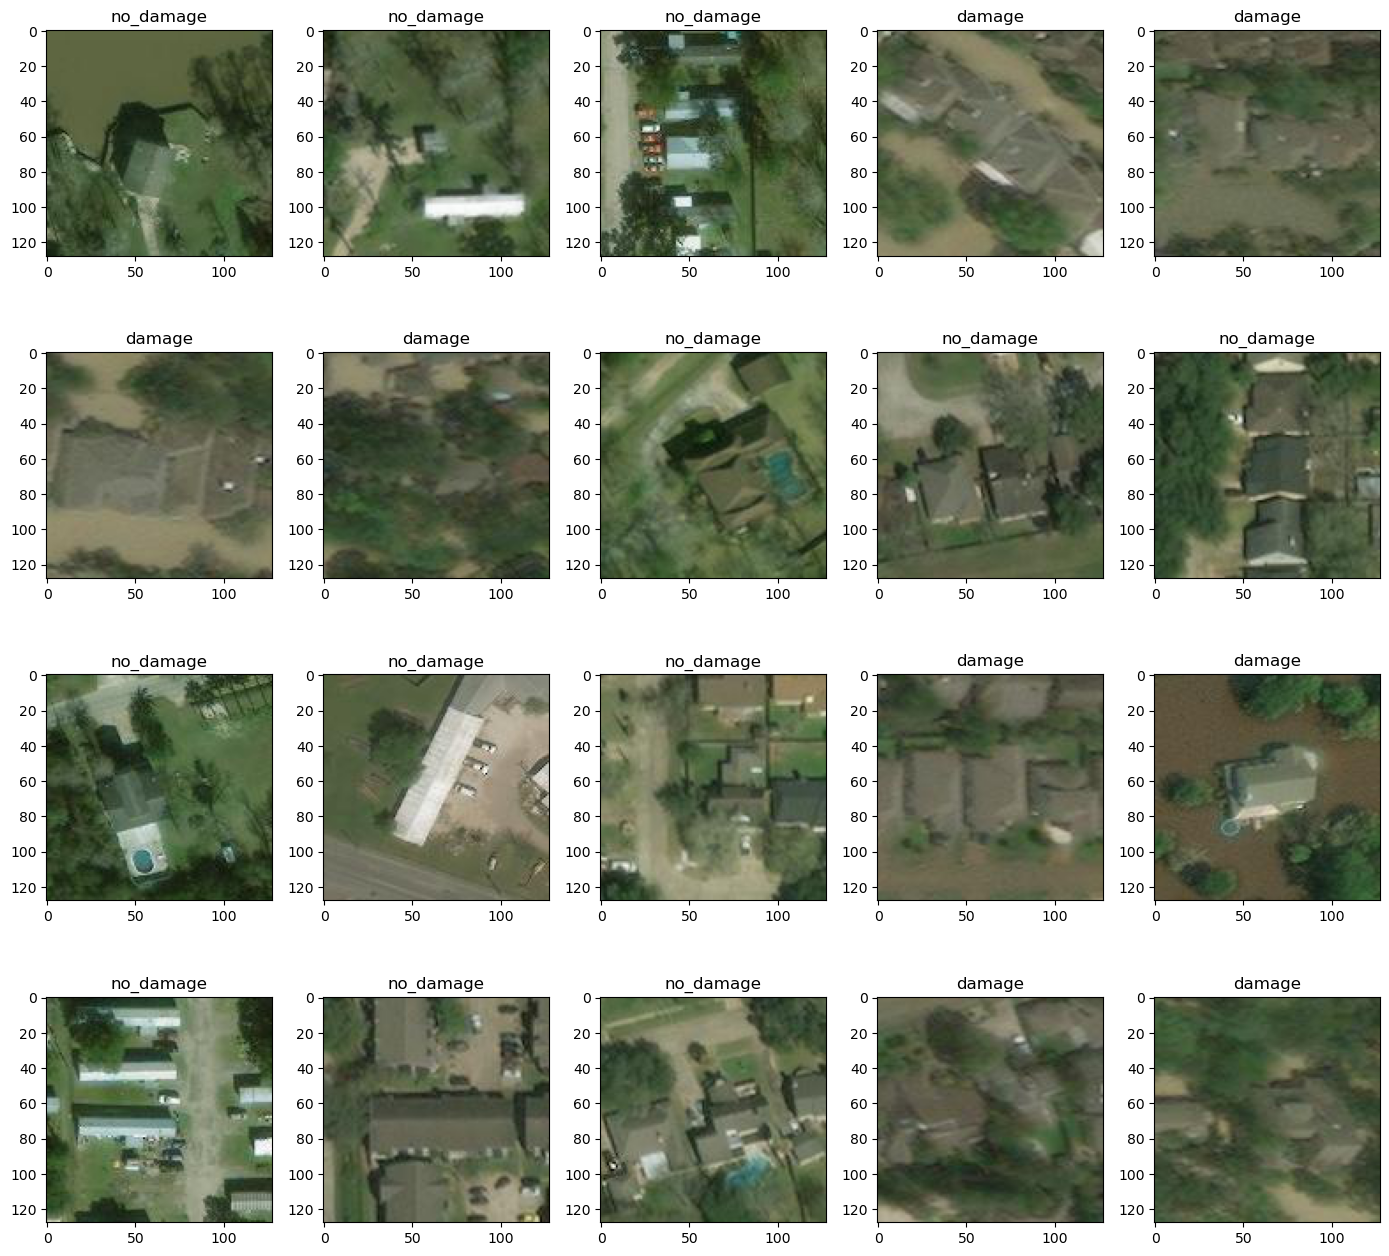

In [73]:
plt.figure(figsize=(14, 14))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(image[i])
    plt.title(label[i])
    if label[i]==1:
        plt.title('no_damage')
    else:
        plt.title('damage')
    plt.tight_layout()

In [41]:
Xtrain  = []
for i in image: 
    Xtrain.append(resize(i,(224,224,3)))
Xtrain=np.array(Xtrain)

In [42]:
Xtest = []
for i in image:
    Xtest.append(resize(i, (224,224,3)))
Xtest = np.array(Xtest)

In [45]:
ytrain = np.array(label)
ytest = np.array(label_test)

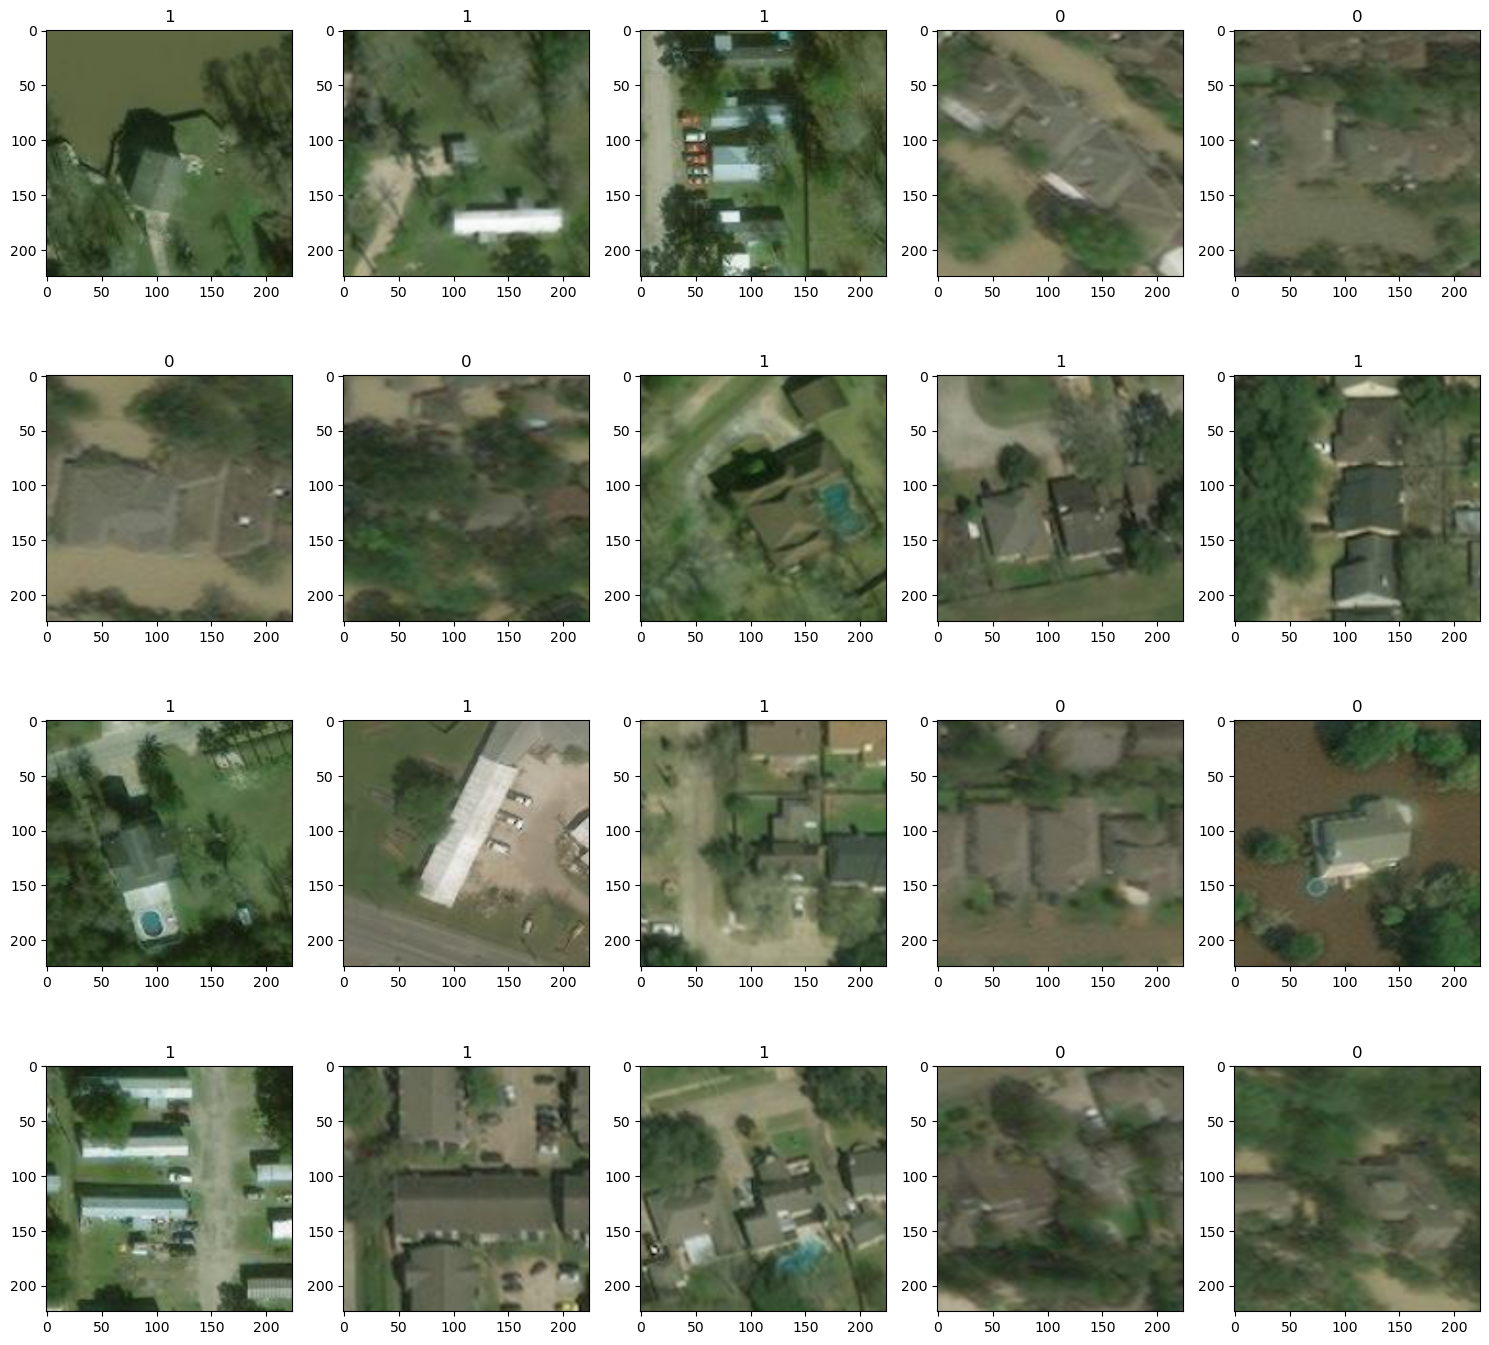

In [71]:
plt.figure(figsize=(15, 15))
for i in range(20):

    plt.subplot(4,5, i+1)
    plt.imshow(Xtrain[i])
    plt.title(label[i])
    plt.tight_layout()

In [55]:
print(f"shape of Xtrain:" , Xtrain.shape)
print(f"Shape of ytrain:" ,ytrain.shape)
print(f"shape of Xtest:" ,Xtest.shape) 
print(f"Shape od ytest:" ,ytest.shape)

shape of Xtrain: (2000, 224, 224, 3)
Shape of ytrain: (2000,)
shape of Xtest: (2000, 224, 224, 3)
Shape od ytest: (2000,)


In [77]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(224,224,3)), 
    keras.layers.MaxPool2D(2,2), 

    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(), 
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

C:\Users\sreer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.compile(optimizer='adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,972,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,977,185 (22.80 MB)

 Trainable params: 5,977,185 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
model.fit(Xtrain, ytrain, epochs = 10, validation_split = 0.1)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 37s 571ms/step - accuracy: 0.5551 - loss: 0.9190 - val_accuracy: 0.6750 - val_loss: 0.6210
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 550ms/step - accuracy: 0.7926 - loss: 0.5159 - val_accuracy: 0.7750 - val_loss: 0.4785
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 42s 558ms/step - accuracy: 0.7822 - loss: 0.4647 - val_accuracy: 0.7350 - val_loss: 0.5346
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 31s 538ms/step - accuracy: 0.8636 - loss: 0.3303 - val_accuracy: 0.7450 - val_loss: 0.4905
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 33s 569ms/step - accuracy: 0.9277 - loss: 0.2443 - val_accuracy: 0.8500 - val_loss: 0.4021
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 32s 557ms/step - accuracy: 0.9312 - loss: 0.2136 - val_accuracy: 0.8500 - val_loss: 0.4080
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 32s 553ms/step - accuracy: 0.9645 - loss: 0.1255 - val_accuracy: 0.8000 - val_loss: 0.4894
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1273s 23s/step - accuracy: 0.9667 - loss: 0.1180 - val_accu

In [85]:
model.evaluate(Xtrain,ytrain)      #evaluate the model

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - accuracy: 0.9984 - loss: 0.0224


[0.06773389130830765, 0.984000027179718]

In [93]:
ypred = model.predict(Xtest)          #predict the model 

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step


In [95]:
ypred = ypred.argmax(axis=1)

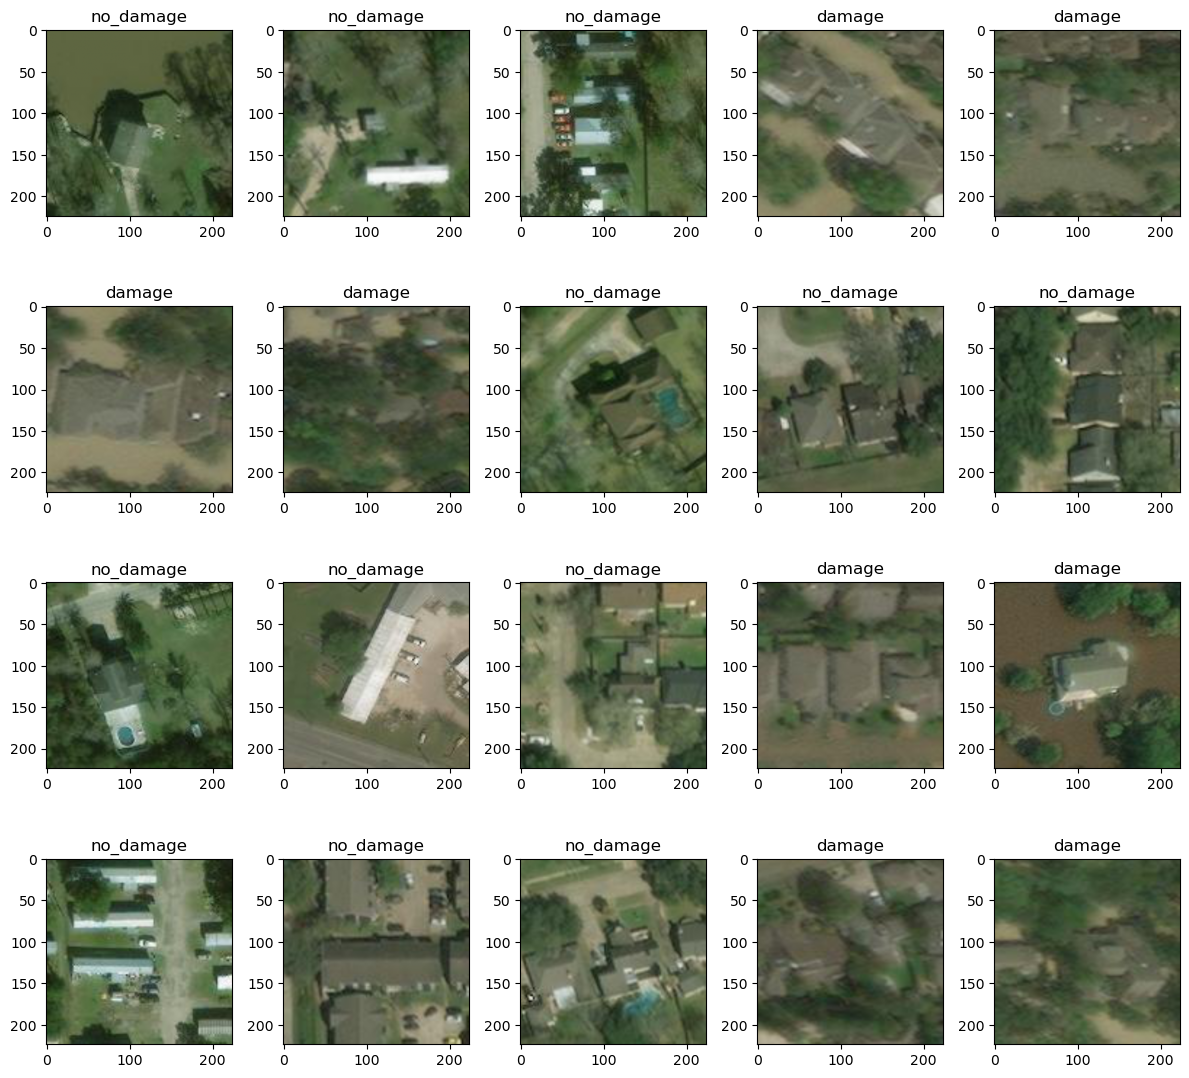

In [89]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(Xtest[i])
    if label[i]==1:
        plt.title('no_damage')
    else:
        plt.title('damage')
    plt.tight_layout()

In [97]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>